# 케라스 보스턴 주택 가격 모델

## modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 데이터 로드

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)

57344/57026 [==============================] - 0s 0us/step


## 데이터 확인

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


## 데이터 전처리

In [ ]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


## 모델 생성 - 가중치 초기화, 배치 정규화, 규제화, 드롭아웃

In [ ]:
model = Sequential([Dense(100, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                          activation='relu', input_shape=(13, ), name='dense1'),
                    LeakyReLU(alpha=0.2),
                    Dropout(0.5),
                    Dense(64, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                          activation='relu', name='dense2'),
                    LeakyReLU(alpha=0.2),
                    Dropout(0.5),
                    Dense(32, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                          activation='relu', name='dense3'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(1, name='output')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense3 (Dense)               (None, 32)                2

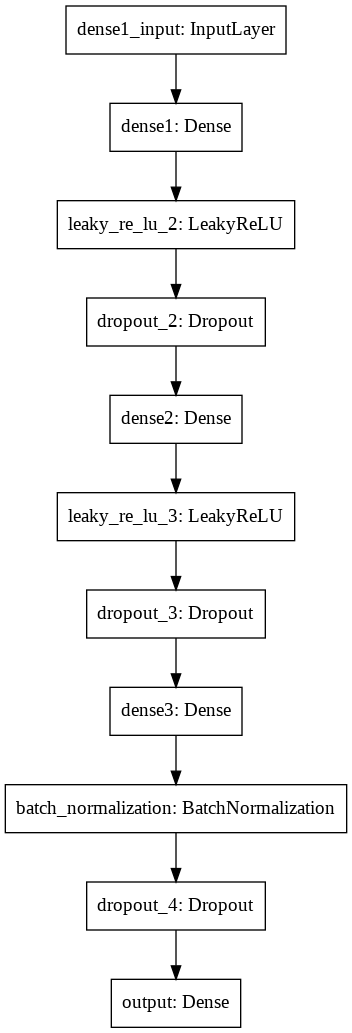

In [ ]:
plot_model(model)

## 모델 컴파일(compile) - optimizer: Adam

In [ ]:
model.compile(loss='mse',
             optimizer=Adam(learning_rate=1e-2, beta_1=0.9, beta_2=0.999),
             metrics=['mae'])

## 모델 학습

In [ ]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 23ms/step - loss: 544.6071 - mae: 21.5724 - val_loss: 624.3114 - val_mae: 23.7811
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 506.4713 - mae: 20.9109 - val_loss: 609.8850 - val_mae: 23.8040
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 460.3147 - mae: 20.1340 - val_loss: 549.2133 - val_mae: 22.6210
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 405.8043 - mae: 18.8261 - val_loss: 452.5111 - val_mae: 20.5100
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 318.2286 - mae: 16.6226 - val_loss: 319.3118 - val_mae: 16.8475
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 240.9253 - mae: 14.0814 - val_loss: 253.6301 - val_mae: 14.9097
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 167.7002 - mae: 11.0916 - val_loss: 168.6373 - val_mae: 11.9312
Epoch 8/300
9/9 [==============================] - 0s 

## 모델 평가

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 22.4368 - mae: 2.9481


[22.436813354492188, 2.948094606399536]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


## Loss & MAE 시각화

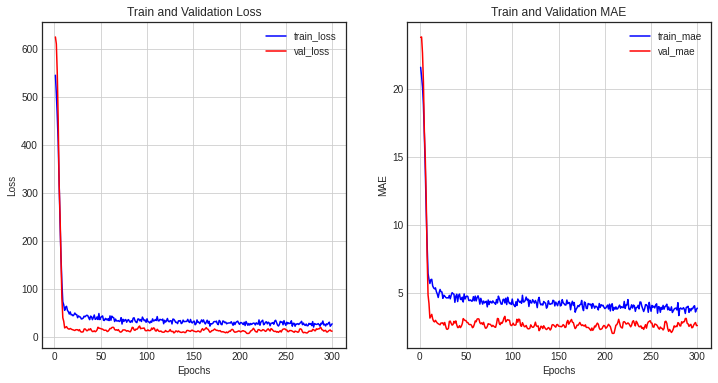

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()